In [5]:
# Just imports
import sympy
import sympy.vector
from sympy import exp
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from optViz import OptViz, R, ColorOrg

In [6]:
## THIS IS WHERE TO INSERT OUR PROBLEM
##

# Define object function and constraints
obj_func = R.x + R.y
# We are one the form constraints >= 0
constraints = [
    2-R.x**2-R.y**2,
    R.y,
]


In [7]:

# Set intervals
x_interval = [-2, 2, 100/(2*np.pi)]
levels_interval = (-3, 5)

optViz = OptViz(objective_function=obj_func, constraints=constraints,
                x_interval=x_interval, levels_interval=levels_interval)

interactive(children=(FloatSlider(value=1.0, description='k', max=5.0, min=-3.0), FloatSlider(value=1.0, descr…

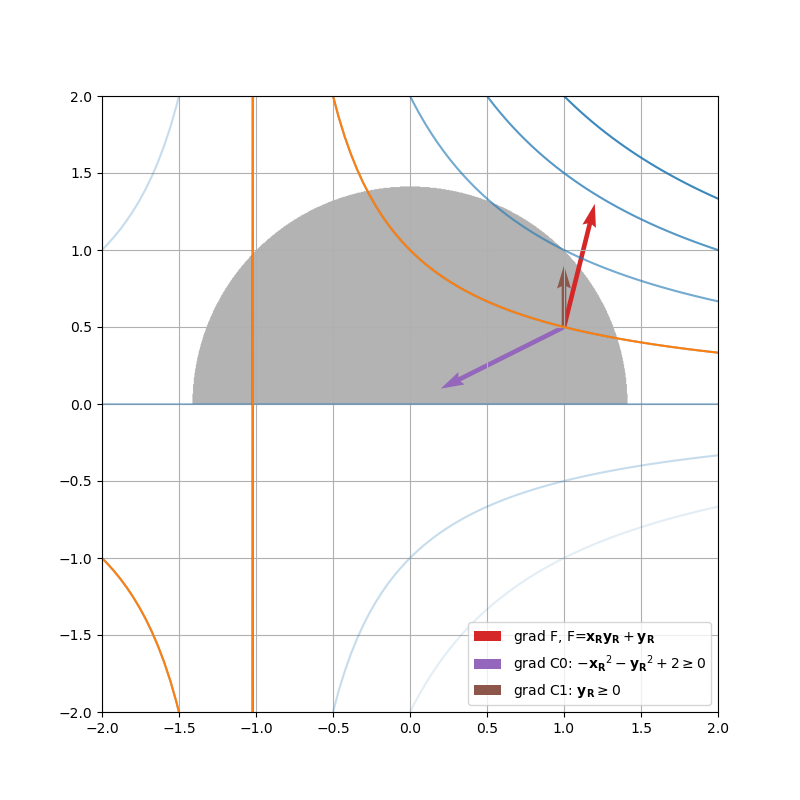

In [8]:
# set up plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_ylim([-4, 4])
ax.grid(True)

x_points = np.linspace(x_interval[0], x_interval[1], 100)
 
@widgets.interact(k=(levels_interval[0], levels_interval[1], 0.1), 
                  x_pos=(x_interval[0], x_interval[1], 0.1),
                  magnitude=(0.005, 0.2, 0.005),
                  level_res=(0.1, 1, 0.1))
def update(k=1, x_pos=1, magnitude=0.1, level_res=1):
    """Remove old lines from plot and plot new one"""
    
    x_pos = np.float32(x_pos)
    color_org = ColorOrg(3) # For organizing colors
    magnitude = max(magnitude, 0.005)
    ax.cla()
    legends = []
    #[l.remove() for l in ax.lines]
    try:
        y_pos = optViz.level_curve_y(x_pos, k)
    except:
        y_pos = 0
    
    
    print(f"f({x_pos}, {y_pos})={k}")
    
    try:
        # Show gradient of objective function
        objx_length, objy_length = optViz.objective_grad_eval(x_pos, y_pos)
        ax.quiver(x_pos, y_pos, objx_length, objy_length, scale=1/magnitude, color=color_org.get_color()) # x_pos, y_pos, x_length, y_length
        legends.append(f"grad F, F=${sympy.latex(obj_func)}$")
        
        # Show gradient of constraints
        for i, (x_length, y_length) in enumerate(optViz.constraints_grad_eval(x_pos, y_pos)):
            ax.quiver(x_pos, y_pos, x_length, y_length, scale=1/magnitude, color=color_org.get_color())
            legends.append(f"grad C{i}: ${sympy.latex(constraints[i]>=0)}$")
            
    except Exception as e:
        print(e)
    
    for i, l in enumerate(np.arange(*levels_interval, level_res)):
        a = i*level_res/(levels_interval[1]-levels_interval[0])
        ax.plot(x_points, optViz.level_curve_y(x_points, l), color='C0', alpha=a)
        
    ax.plot(x_points, optViz.level_curve_y(x_points, k), color='C1')
    feas_reg, extent = optViz.get_feasable_region_map()
    ax.imshow(feas_reg, extent=extent, origin="lower", cmap="Greys", alpha = 0.3)
    
    ax.legend(legends)
    
    ax.grid()
    